In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$
\omega \in [0, 1]\\
\operatorname{w}\left( \omega \right) :=\frac{1}{2}+\frac{\omega}{2}  \\
w \in [\frac{1}{2}, 1]
$$

In [60]:
def w(ω):
    return 1/2+ω/2

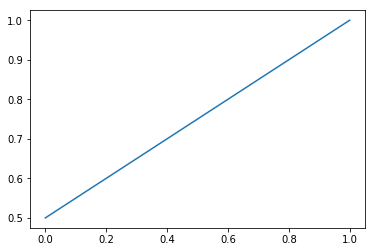

In [4]:
z = np.linspace(0, 1, 100)
plt.plot(z, w(z));

$$x(w) = \frac{1-w}{w}$$

In [3]:
def x(w):
    return (1-w)/w

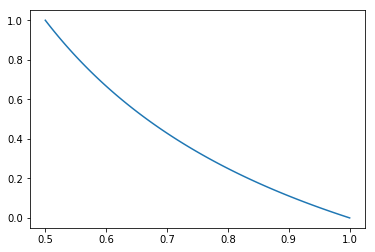

In [6]:
z = np.linspace(0.5, 1, 100)
plt.plot(z, x(z));

Sum of $\pi$ from $a$ to $b$
$$
a, b \in \mathrm{Z} \\
a < b \\
\operatorname{Spi}\left( x,a,b\right) :=\frac{bx^{b-a+1}}{\left( x-1\right)} + \frac{ a\, - {{x}({a-1})}- {x^{b-a+1}}  }{\left( x-1\right)^2}
$$

In [4]:
def Spi(x, a, b):
    if x == 1:
        return (b**2 + b - a**2 + a)/2
    return b*x**(b-a+1)/(x-1) + (a-x*(a-1) - x**(b-a+1))/(x-1)**2

In [8]:
Spi(2, 2, 4)

24.0

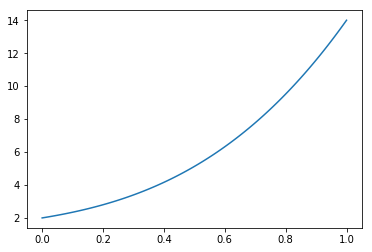

In [9]:
z = np.linspace(0, 1, 100)
plt.plot(z, [Spi(z, 2, 5) for z in z]);

$$\operatorname{\pi_2}\left( w,a\right) := \frac{2w + 1}{4w}\, a$$

$$ \operatorname{\pi_3}\left( w,a\right) := \frac{2w + 1}{8w^2}\, a$$

$$ \operatorname{\pi_4}\left( w,a\right) := \frac{1}{8w^3} a$$

In [12]:
def pi2(w, a):
    return (2*w+1)/(4*w)*a

def pi3(w, a):
    return (2*w+1)/(8*w*w)*a

def pi4(w, a):
    return 1/(8*w*w*w)*a

In [22]:
print(pi2(1, 1))
print(pi3(1, 1))
print(pi4(1, 1))

0.75
0.375
0.125


$$\operatorname{\mu}\left( w,a,N\right) := -\operatorname{Spi}( x, 3,\frac{N}{2}) \frac{a}{2w} - 2a + 2 \operatorname{\pi_2}\left( w,a\right) +3 \operatorname{\pi_3}\left( w,a\right) +\operatorname{Spi}\left( x,4,\frac{N}{2}\right)  \operatorname{\pi_4}\left( w,a\right) \\
x = \frac{1-w}{w}
$$

In [6]:
def mu(w, a, N):
    return -Spi(x(w), 3, N/2) * a/(2*w) -2*a + 2*pi2(w,a) + 3*pi3(w, a) + Spi(x(w), 4, N/2) * pi4(w, a)

In [23]:
Spi(x(1), 3, 10)/10

0.3

In [24]:
mu(1, 1/10, 20)

-0.03749999999999999

$$
\operatorname{M_{\pi}}(x, a, b) = \frac{x^{b+1} - x^{a}}{x-1}
$$

In [43]:
def Mpi(x, a, b):
    if x == 1:
        return b-a+1
    return (x**(b-a+1) - 1)/(x-1)

In [19]:
Mpi(2, 2, 4)

7.0

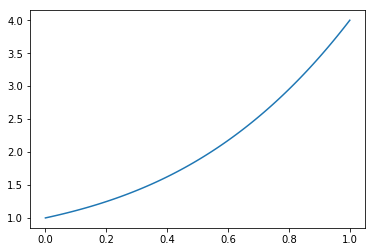

In [20]:
z = np.linspace(0, 1, 100)
plt.plot(z, [Mpi(z, 2, 5) for z in z]);

$$
a = \dfrac{1}{Mpi(x(w), 3, \frac{N}{2})\frac{1}{2w} + 4 + \cdot \pi_2(w, 1) + \cdot \pi_3(w, 1) + Mpi(x(w), 4, \frac{N}{2}) \cdot  \pi_4(w, 1))}
$$

In [39]:
def calculateA(w, N): 
    denominator = Mpi(x(w), 3, N/2)/(2*w) + 4 + pi2(w, 1) + pi3(w, 1) + Mpi(x(w), 4, N/2)*pi4(w, 1)
    return 1/(denominator)

In [44]:
Mpi(x(1), 3, N/2)/(2*1)

0.5

In [45]:
calculateA(1.0, 20)

0.17391304347826086

In [46]:
theA = calculateA(w(1), 20)
mu(1, theA, 20)

-0.0652173913043479

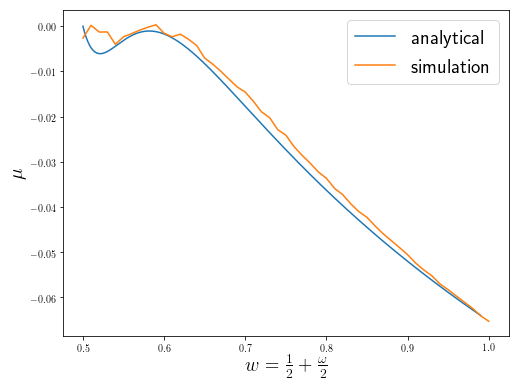

In [62]:
from matplotlib import rc
rc('text', usetex=True)

plt.figure(figsize=(8, 6))

N = 20
inp = np.linspace(0.5, 0.99, num=1000)
outp = [mu(inp, calculateA(w(inp), N), N) for inp in inp]
plt.plot(inp, outp, label="analytical");
plt.xlabel('$w = \\frac{1}{2} + \\frac{\\omega}{2}$', fontsize=20)
plt.ylabel('$\\mu$', fontsize=20);

df = pd.read_csv('../csv/omegas/N=20/lin-step-tau-1-d-2.csv', sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
omegas = toDict['omega']
mus = toDict['µ']

ws = 1/2 + np.array(omegas)/2

plt.plot(ws, mus, label="simulation");
plt.legend(fontsize=20);

In [48]:
# calculate arg max(µ(w))

np_outp = np.array(outp)
for i in range(1, len(outp)-1):
    if outp[i-1] < outp[i] and outp[i] > outp[i+1]:
        print(inp[i])

0.5819119119119119


In [63]:
# calculate arg min(µ(w))

np_outp = np.array(outp)
for i in range(1, len(outp)-1):
    if outp[i-1] > outp[i] and outp[i] < outp[i+1]:
        print(inp[i])

0.5210910910910911


In [49]:
# calculate Arg max(µ(w))

0.5 + (0.99-0.5)/1000*np.where(outp == max(outp))[0][0]

0.5